In [1]:
import pandas as pd
#Importing all required libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#Plotting Plots
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import pandas as pd
df = pd.read_csv("/Users/Arjun D H/Documents/the movie data.csv",engine='python',encoding='utf-8')

In [3]:
df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
df.shape

(4803, 20)

In [7]:
genres = df['genres'].dropna()

In [8]:
genres = genres.tolist()

In [9]:
print(genres[2])

[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]


In [10]:
print(len(genres))

4803


In [15]:
top5budget = df['budget'].value_counts()
top5budget[0:5]

0           1037
20000000     144
30000000     128
25000000     126
40000000     123
Name: budget, dtype: int64

In [17]:
top10genres = df['genres'].value_counts()
top10genres[0:10]

[{"id": 18, "name": "Drama"}]                                                                    370
[{"id": 35, "name": "Comedy"}]                                                                   282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                  164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                 144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                      142
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]    109
[{"id": 27, "name": "Horror"}, {"id": 53, "name": "Thriller"}]                                    88
[{"id": 99, "name": "Documentary"}]                                                               68
[{"id": 27, "name": "Horror"}]                                                                    64
[{"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]                              

In [20]:
top5production_companies = df['production_companies'].value_counts()
top5production_companies[0:5]

[]                                            351
[{"name": "Paramount Pictures", "id": 4}]      58
[{"name": "Universal Pictures", "id": 33}]     45
[{"name": "New Line Cinema", "id": 12}]        38
[{"name": "Columbia Pictures", "id": 5}]       37
Name: production_companies, dtype: int64

In [22]:
top5production_countries = df['production_countries'].value_counts()
top5production_countries = top5production_countries[0:5]
print(type(top5production_countries))

<class 'pandas.core.series.Series'>


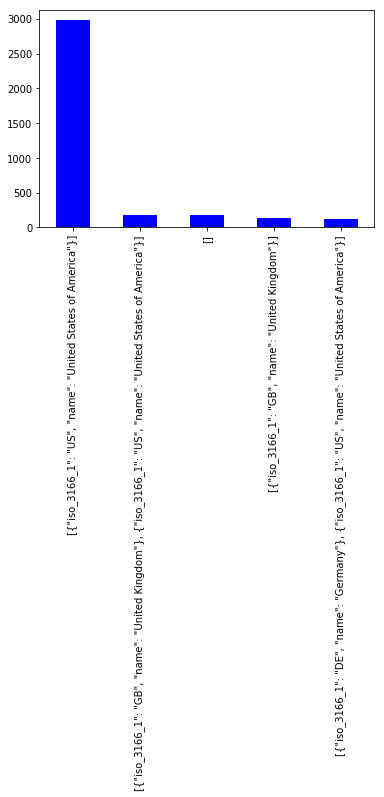

In [23]:
top5production_countries.plot.bar(stacked=True, colormap='winter')

In [24]:
difftagline= df['tagline'].dropna()

In [25]:
difftagline.value_counts()

Based on a true story.                                                                       3
Based on the incredible true story.                                                          2
From zero to hero.                                                                           2
Worlds Collide                                                                               2
There are no clean getaways.                                                                 2
There are two sides to every love story.                                                     2
Who's next?                                                                                  2
The only way out is down.                                                                    2
Be careful what you wish for.                                                                2
You never forget your first love.                                                            2
One way in. No way out.                           

In [26]:
dfgenres= df['genres'].value_counts()
dfgenres = dfgenres[0:10]

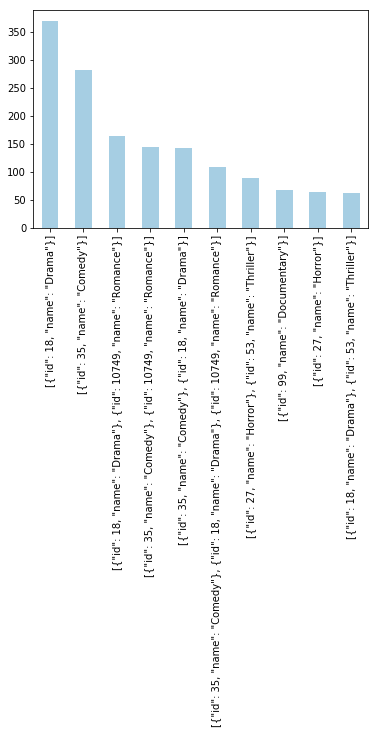

In [27]:
dfgenres.plot.bar(stacked=True, colormap='Paired')

In [33]:
top5vote_count = df['vote_count'].value_counts()
top5vote_count[0:5]

0    62
1    53
2    46
4    43
3    41
Name: vote_count, dtype: int64

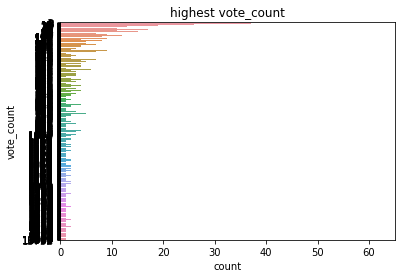

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="vote_count", data=df)
plt.title("highest vote_count")

plt.show()

In [35]:
top10vote_average= df['vote_average'].value_counts()
top10vote_average[0:10]

0.0     63
7.6     62
5.1     60
7.7     56
4.8     56
4.7     51
4.6     38
7.8     36
8.0     35
7.9     32
4.5     32
4.4     29
4.3     28
4.1     25
4.2     21
8.1     18
8.2     15
3.0     13
4.0     13
3.5     12
3.9     12
3.8     10
3.3      9
3.7      9
8.3      7
3.2      7
2.0      6
2.9      5
10.0     4
Name: vote_average, dtype: int64

In [36]:
difftitle= df['title'].dropna()

In [37]:
difftitle.value_counts()

Batman                                2
The Host                              2
Out of the Blue                       2
Shade                                 1
Maze Runner: The Scorch Trials        1
Silent Hill: Revelation 3D            1
Of Horses and Men                     1
I Am Wrath                            1
Menace II Society                     1
This Is Where I Leave You             1
The Act of Killing                    1
The Chorus                            1
The Pursuit of D.B. Cooper            1
The Skulls                            1
Hatchet                               1
The Bubble                            1
The Avengers                          1
Little Nicholas                       1
Guess Who                             1
Sorcerer                              1
We Are Marshall                       1
Western Religion                      1
Central Station                       1
Bridget Jones's Diary                 1
The Bourne Ultimatum                  1


# Analysis of title Data

In [38]:
title= df['title'].dropna()

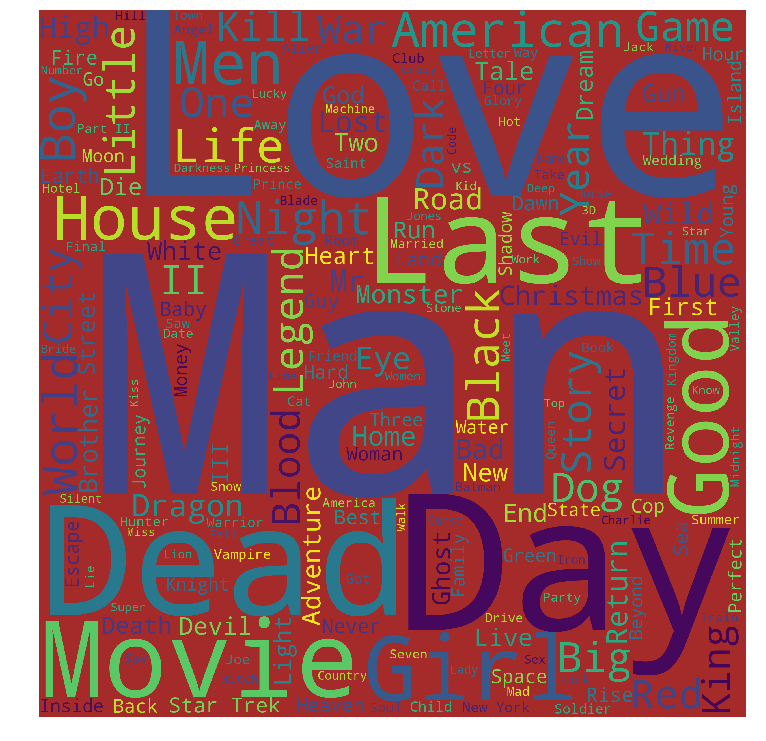

In [39]:
from wordcloud import WordCloud, STOPWORDS

def showWordCloud(data):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords = STOPWORDS,
                         background_color = 'brown',
                         width = 2500,
                         height = 2500
                         ).generate(cleaned_word)
    plt.figure(1,figsize = (13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

showWordCloud(title)

In [40]:
title = title.tolist()

In [41]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [42]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(title))

print(data_words[:1])

[['avatar']]


In [43]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['avatar']


In [44]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [45]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:4])

[['avatar'], ['world', 'end'], [], ['knight']]


In [46]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1)]]


In [47]:
id2word[0]

'avatar'

In [48]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('avatar', 1)], [('end', 1), ('world', 1)], []]

# Build LDA Model for title Data

In [49]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [50]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.015*"movie" + 0.012*"boy" + 0.011*"woman" + 0.010*"house" + 0.009*"street" + 0.008*"part" + 0.007*"show" + 0.006*"snow" + 0.006*"moon" + 0.006*"road"'), (1, '0.052*"man" + 0.028*"day" + 0.012*"dream" + 0.011*"brother" + 0.010*"bang" + 0.010*"party" + 0.009*"child" + 0.009*"mother" + 0.008*"revenge" + 0.008*"baby"'), (2, '0.045*"girl" + 0.022*"dog" + 0.015*"sister" + 0.013*"monster" + 0.011*"room" + 0.011*"light" + 0.010*"heart" + 0.010*"land" + 0.009*"god" + 0.009*"saint"'), (3, '0.141*"date" + 0.028*"story" + 0.020*"time" + 0.014*"blood" + 0.011*"year" + 0.009*"world" + 0.009*"ape" + 0.008*"hollywood" + 0.008*"fish" + 0.008*"valley"'), (4, '0.042*"love" + 0.023*"night" + 0.015*"life" + 0.013*"death" + 0.012*"christmas" + 0.011*"thing" + 0.009*"friday" + 0.008*"guy" + 0.008*"summer" + 0.008*"cat"')]


In [51]:
# Compute Model Perplexity and Coherence Score

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.44699380452779

Coherence Score:  0.8040703729938675


In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.129230 -0.126255       1        1  38.297607
4      0.067148 -0.028617       2        1  18.810568
3     -0.204479 -0.084266       3        1  15.297343
1      0.012797  0.121755       4        1  14.106509
2     -0.004696  0.117384       5        1  13.487972, topic_info=     Category        Freq                 Term       Total  loglift  logprob
481   Default  130.000000                 date  130.000000  30.0000  30.0000
6     Default   44.000000                  man   44.000000  29.0000  29.0000
613   Default   48.000000                 love   48.000000  28.0000  28.0000
369   Default   36.000000                 girl   36.000000  27.0000  27.0000
53    Default   26.000000                story   26.000000  26.0000  26.0000
57    Default   24.000000                  day   24.000000  25.0000  25.0000
149   Default   26.000000                night   26.000000  24.0000  24.0000
629   Default   18.000000                  dog   18.000000  23.0000  23.0000
63    Default   18.000000                 time   18.000000  22.0000  22.0000
170   Default   34.000000                movie   34.000000  21.0000  21.0000
239   Default   17.000000                 life   17.000000  20.0000  20.0000
590   Default   15.000000                death   15.000000  19.0000  19.0000
1313  Default   12.000000               sister   12.000000  18.0000  18.0000
10    Default   13.000000                blood   13.000000  17.0000  17.0000
213   Default   28.000000                  boy   28.000000  16.0000  16.0000
76    Default   13.000000            christmas   13.000000  15.0000  15.0000
44    Default   11.000000              monster   11.000000  14.0000  14.0000
569   Default   26.000000                woman   26.000000  13.0000  13.0000
456   Default   10.000000                dream   10.000000  12.0000  12.0000
315   Default   12.000000                thing   12.000000  11.0000  11.0000
175   Default   24.000000                house   24.000000  10.0000  10.0000
540   Default   10.000000                 year   10.000000   9.0000   9.0000
457   Default   10.000000              brother   10.000000   8.0000   8.0000
845   Default    9.000000                 room    9.000000   7.0000   7.0000
1409  Default    9.000000                light    9.000000   6.0000   6.0000
1091  Default    9.000000                 bang    9.000000   5.0000   5.0000
333   Default    8.000000                heart    8.000000   4.0000   4.0000
1008  Default    8.000000                party    8.000000   3.0000   3.0000
319   Default   21.000000               street   21.000000   2.0000   2.0000
328   Default    8.000000                 land    8.000000   1.0000   1.0000
...       ...         ...                  ...         ...      ...      ...
1313   Topic5   11.867143               sister   12.457794   1.9548  -4.2260
44     Topic5   10.555005              monster   11.148271   1.9487  -4.3432
845    Topic5    8.757987                 room    9.348351   1.9381  -4.5298
1409   Topic5    8.597899                light    9.188003   1.9370  -4.5483
333    Topic5    8.163988                heart    8.753946   1.9336  -4.6001
328    Topic5    8.015088                 land    8.607141   1.9321  -4.6185
385    Topic5    7.405426                saint    7.996192   1.9266  -4.6976
191    Topic5    7.410092                  god    8.002903   1.9264  -4.6970
388    Topic5    6.967869                devil    7.558656   1.9220  -4.7585
1268   Topic5    6.936434                grace    7.543447   1.9195  -4.7630
602    Topic5    6.718550                 kill    7.311949   1.9187  -4.7949
346    Topic5    6.539292                  sex    7.131475   1.9167  -4.8220
1683   Topic5    6.573024              station    7.169431   1.9165  -4.8168
36     Topic5    6.155262              america    6.746341   1.9117  -4.8825
345    Topic5    5.927315            

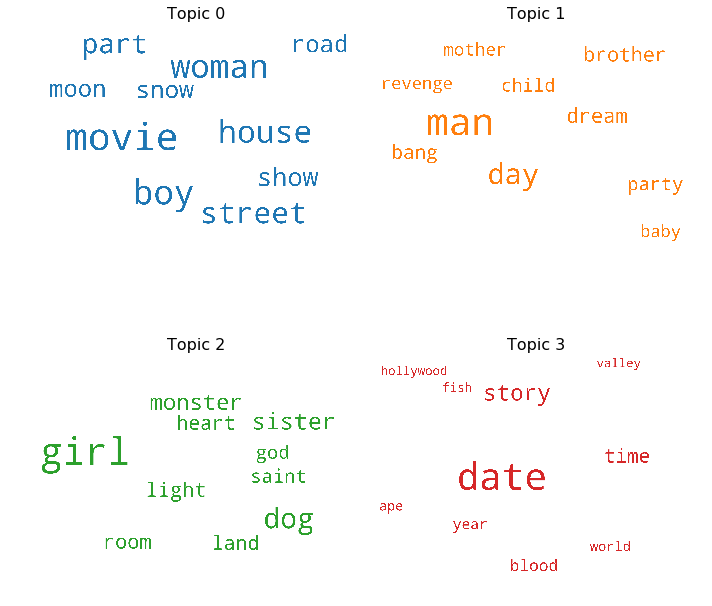

In [54]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Hyperparameter Tuning - Number of Topics and Alpha

In [55]:
# compute coherence value at various values of alpha and num_topics
def compute_coherence_values(dictionary, corpus, texts, num_topics_range, alpha_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=dictionary,
                                               num_topics=num_topics, 
                                               alpha=alpha,
                                               per_word_topics=True)
            model_list.append(lda_model)
            coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append((alpha, num_topics, coherencemodel.get_coherence()))
        

    return model_list, coherence_values

In [56]:
num_topics_range = [2, 6, 10, 15, 20]
alpha_range = [0.01, 0.1, 0.001]
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        num_topics_range=num_topics_range, 
                                                        alpha_range=alpha_range)

In [57]:
coherence_df = pd.DataFrame(coherence_values, columns=['alpha', 'num_topics', 'coherence_value'])
coherence_df

,alpha,num_topics,coherence_value
0,0.010,2,0.800676
1,0.010,6,0.798016
2,0.010,10,0.795276
3,0.010,15,0.790183
4,0.010,20,0.759054
5,0.100,2,0.797455
6,0.100,6,0.802273
7,0.100,10,0.787484
8,0.100,15,0.792813
9,0.100,20,0.782186


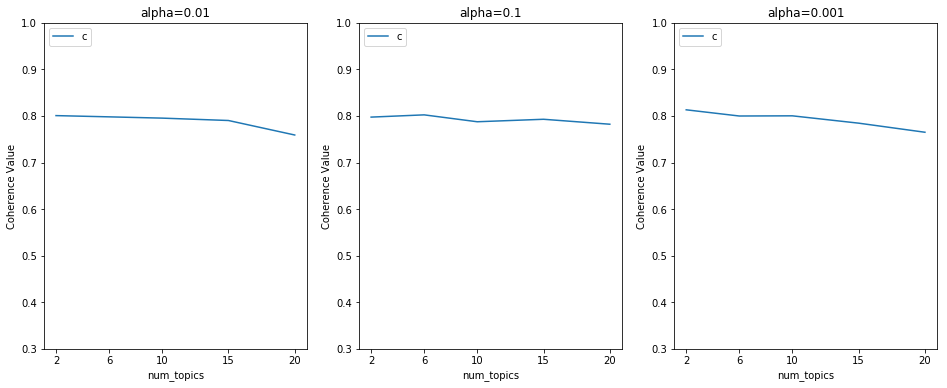

In [58]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))

    for i, val in enumerate(alpha_range):

        # subplot 1/3/i
        plt.subplot(1, 3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha']==val]

        plt.plot(alpha_subset["num_topics"], alpha_subset["coherence_value"])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.30, 1])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)

plot_coherence(coherence_df, alpha_range, num_topics_range)

In [59]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [60]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.073*"snow" + 0.000*"summer" + 0.000*"angel" + 0.000*"dwarf" + '
  '0.000*"queen" + 0.000*"flower" + 0.000*"fan" + 0.000*"tale" + '
  '0.000*"terror" + 0.000*"sense"'),
 (1,
  '0.049*"revenge" + 0.043*"america" + 0.003*"iron" + 0.001*"captain" + '
  '0.000*"carousel" + 0.000*"holliday" + 0.000*"myer" + 0.000*"part" + '
  '0.000*"freddy" + 0.000*"head"'),
 (2,
  '0.035*"witch" + 0.028*"hunter" + 0.027*"battle" + 0.021*"lion" + '
  '0.003*"titanic" + 0.000*"blair" + 0.000*"project" + 0.000*"zombie" + '
  '0.000*"height" + 0.000*"shaker"'),
 (3,
  '0.043*"war" + 0.022*"star" + 0.022*"winter" + 0.019*"soldier" + '
  '0.011*"machine" + 0.003*"alien" + 0.000*"profiteer" + 0.000*"sale" + '
  '0.000*"saint" + 0.000*"bone"'),
 (4,
  '0.231*"man" + 0.059*"christmas" + 0.026*"end" + 0.020*"darkness" + '
  '0.007*"hood" + 0.000*"house" + 0.000*"company" + 0.000*"earth" + '
  '0.000*"nothing" + 0.000*"bunny"'),
 (5,
  '0.070*"monster" + 0.065*"moon" + 0.014*"book" + 0.004*"jungle" + '
  '0

In [61]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -24.871407078857874

Coherence Score:  0.6650099920526303


In [62]:
coherence_model_lda.get_coherence_per_topic()

[0.7136074168962626,
 0.5159407165235038,
 0.5865211541592926,
 0.5743446582463505,
 0.6741386200562689,
 0.64528491413312,
 0.8150622250642142,
 0.6999830474382593,
 0.601176266071373,
 0.6806342685301704,
 0.8150622250642142,
 0.6532374797450211,
 0.6905799071186011,
 0.6735301471319629,
 0.6360468346108409]

In [63]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4      0.080573 -0.123127       1        1  7.557259
9     -0.150471 -0.051865       2        1  7.460739
8      0.009343  0.021724       3        1  7.099322
13     0.014809  0.042360       4        1  7.090355
11     0.015686  0.046560       5        1  6.972075
3      0.003054  0.005732       6        1  6.817707
7      0.003800  0.007373       7        1  6.734318
14     0.012810  0.033846       8        1  6.657292
1      0.002316  0.004157       9        1  6.457116
5      0.004625  0.009253      10        1  6.448475
2      0.002887  0.005370      11        1  6.435366
12     0.000708  0.000809      12        1  6.185843
0      0.001579  0.002613      13        1  6.138519
10    -0.000860 -0.002403      14        1  5.972811
6     -0.000860 -0.002403      15        1  5.972811, topic_info=     Category        Freq          Term       Total  loglift  logprob
6     Default  106.000000           man  106.000000  30.0000  30.0000
369   Default   90.000000          girl   90.000000  29.0000  29.0000
53    Default   68.000000         story   68.000000  28.0000  28.0000
57    Default   54.000000           day   54.000000  27.0000  27.0000
63    Default   50.000000          time   50.000000  26.0000  26.0000
149   Default   50.000000         night   50.000000  25.0000  25.0000
319   Default   41.000000        street   41.000000  24.0000  24.0000
629   Default   41.000000           dog   41.000000  23.0000  23.0000
10    Default   34.000000         blood   34.000000  22.0000  22.0000
100   Default   28.000000          snow   28.000000  21.0000  21.0000
44    Default   28.000000       monster   28.000000  20.0000  20.0000
2     Default   27.000000         world   27.000000  19.0000  19.0000
65    Default   26.000000          moon   26.000000  18.0000  18.0000
456   Default   28.000000         dream   28.000000  17.0000  17.0000
76    Default   28.000000     christmas   28.000000  16.0000  16.0000
102   Default   23.000000           ape   23.000000  15.0000  15.0000
46    Default   20.000000       revenge   20.000000  14.0000  14.0000
328   Default   20.000000          land   20.000000  13.0000  13.0000
38    Default   19.000000           war   19.000000  12.0000  12.0000
36    Default   18.000000       america   18.000000  11.0000  11.0000
108   Default   17.000000          hero   17.000000  10.0000  10.0000
82    Default   15.000000         witch   15.000000   9.0000   9.0000
103   Default   14.000000        planet   14.000000   8.0000   8.0000
51    Default   13.000000           car   13.000000   7.0000   7.0000
468   Default   12.000000        hunter   12.000000   6.0000   6.0000
1     Default   13.000000           end   13.000000   5.0000   5.0000
28    Default   11.000000        battle   11.000000   4.0000   4.0000
59    Default   11.000000          jack   11.000000   3.0000   3.0000
33    Default   12.000000          king   12.000000   2.0000   2.0000
73    Default   11.000000          hour   11.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
2224  Topic15    0.125726        mother    1.741176   0.1897  -7.9589
291   Topic15    0.125726          town    1.741173   0.1897  -7.9589
1268  Topic15    0.125726         grace    1.741172   0.1897  -7.9589
602   Topic15    0.125726          kill    1.741170   0.1897  -7.9589
1683  Topic15    0.125726       station    1.741169   0.1897  -7.9589
1369  Topic15    0.125726         romeo    1.741168   0.1897  -7.9589
346   Topic15    0.125726           sex    1.741169   0.1897  -7.9589
641   Topic15    0.125726        sunday    1.741165   0.1897  -7.9589
1447  Topic15    0.125726        school    1.741166   0.1897  -7.9589
345   Topic15    0.125725          city    1.741164   0.1897  -7.9589
826   Topic15    0.125725        letter    1.741162   0.1897  -7.9589
2469  Topic15    0.125725  conversation    1.7

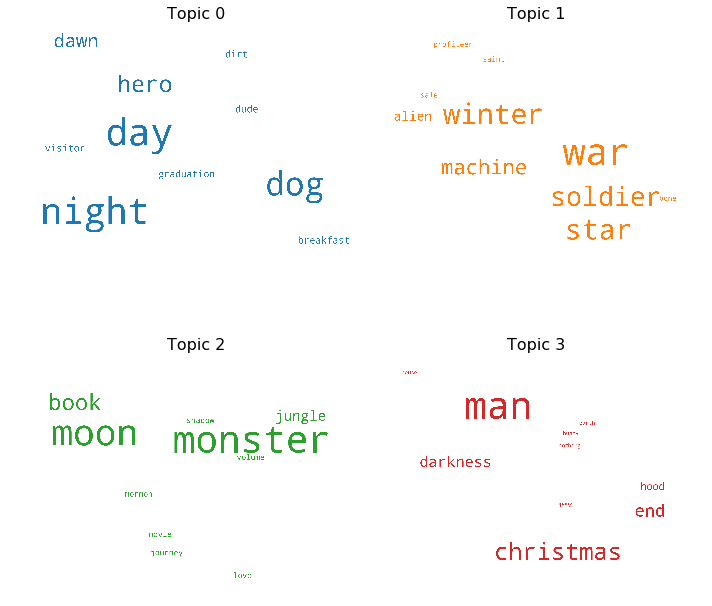

In [64]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()